# Crystal Graph Convolutional Neural Networks
### Sheth Riya Nimish
### A0176880R
e0235287@u.nus.edu

#### The code here is to execute the crystal graph convolutional neural network. The code here has been written by me from scratch while the model used is a published model. 

The model was published in the following github repository: https://github.com/txie-93/cgcnn

#### Table of Contents

* [Importing the Required Libraries](#import)
* [Creating a Document to Store the Results](#create)
* [Hyperparameter Optimisation](#opt)
   * [Learning Rate](#lr)
   * [Optimizers](#optim)
   * [Number of Convolutional Layers](#ncl)
   * [Training Ratio](#tr)
   * [Atom Features](#af)
   * [Hidden Layers After Pooling](#hl)
* [Evaluation of the Accuracy of the Model](#eval)
* [Simulaneous Hyperparameter Optimisation](#sho)
* [The Best Model Obtained](#bmo)

Apart from writing code myself, I also used machine learning models published in papers to conduct similar prediction studies as above. Xie et al used Crystal Graph Convolutional Neural Networks to directly learn material properties from the connection of atoms in the crystal. This model required the input to be a CIF (Crystallographic Information Framework) and the input given to this model was all the CIF files from 2DMatpedia.

### Importing the Required Libraries<a class="anchor" id="import"></a>

In [3]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np
import docx

### Creating a Document to Store the Results of Machine Learning <a class="anchor" id="create"></a>

In [4]:
mydoc= docx.Document()
mydoc.add_heading("Crystal Graph Convolultional Neural Networks", 0)

### Evaluation of Accuracy<a class="anchor" id="eval"></a>
This function helps us to determine the accuracy of the model. Since the model results in a probabilistic classification it is important to compute the accuracy by rounding up the probability rendered.

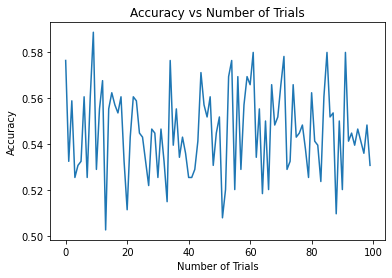

In [7]:
def calculate_accuracy():
    
    testresults= pd.read_csv("test_results.csv")
    materialid= (testresults.iloc[:, 0]).values.tolist()
    targetvalue= (testresults.iloc[:, 1]).values.tolist()
    probability= (testresults.iloc[:, 2]).values.tolist()
  
    choice= [0, 1]
    probresults= []
    count=0
    for i in range (0, len(probability)):
        result= random.choices(choice, weights= (1-probability[i], probability[i]), k=1)
        if result[0] == targetvalue[i]:
            count= count+1
    accuracy= count/len(probability)
    return accuracy

accuracylist=[]
for i in range (100):
    accuracylist.append(calculate_accuracy())

plt.plot(accuracylist)
plt.title("Accuracy vs Number of Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.savefig("accuracyvsnumberoftrials.png")
mydoc.add_paragraph("Accuracy vs Number of Trials")
mydoc.add_picture("accuracyvsnumberoftrials.png")

### Hyperparameter Optimisation <a class="anchor" id="opt"></a>

This model was not trained for this specific dataset, hence it is necessary to optimise the model such that the parameters are specifically suited for this dataset and can yield the best performance. Different parameters such as training ratio, learning rate were optimised. One of the difficulties in this optimisation was the fact that the model had to run through the terminal so the options for each of the parameters had to be manually coded as seen below and hence only a few alternatives for each of the parameters could be computed. It was also computationally very time-consuming hence hyperparameter optimisation could not be carried out in greater detail

#### Learning Rate <a class="anchor" id="lr"></a>
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

In [8]:
accuracylist=[]
learningrates= [0.01, 0.05, 0.10, 0.15, 0.2]

for i in range(5):
    
    if i==0:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --lr 0.01 data/cif
    if i==1:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --lr 0.05 data/cif
    if i==2:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --lr 0.10 data/cif
    if i==3:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --lr 0.15 data/cif
    if i==4:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --lr 0.20 data/cif
    
    accuracylist.append(calculate_accuracy())

lt.plot(learningrates, accuracylist)
plt.title("Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.savefig("accuracyvslearningrate.png")
mydoc.add_paragraph("Accuracy vs Learning Rate")
mydoc.add_picture("accuracyvslearningrate.png")


/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
Epoch: [0][0/7]	Time 7.290 (7.290)	Data 3.503 (3.503)	Loss 0.8479 (0.8479)	Accu 0.484 (0.484)	Precision 0.514 (0.514)	Recall 0.284 (0.284)	F1 0.365 (0.365)	AUC 0.523 (0.523)
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite pre

Epoch: [0][0/7]	Time 6.830 (6.830)	Data 3.186 (3.186)	Loss 0.8442 (0.8442)	Accu 0.520 (0.520)	Precision 0.518 (0.518)	Recall 0.878 (0.878)	F1 0.652 (0.652)	AUC 0.441 (0.441)
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/Desktop/RNS-FYP/CGCNN/cgcnn/data.py:331: UserWarning: 2dm-5000 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough ne

/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Test: [0/3]	Time 5.016 (5.016)	Loss 0.6960 (0.6960)	Acc

Test: [0/3]	Time 3.394 (3.394)	Loss 0.6902 (0.6902)	Accu 0.500 (0.500)	Precision 0.500 (0.500)	Recall 1.000 (1.000)	F1 0.667 (0.667)	AUC 0.719 (0.719)
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/Users/riyasheth/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
 * AUC 0.749
Epoch: [1][0/7]	Time 3.451 (3.451)	Data 0.014 (0.014)	Loss 0.6658 (0.6658)	Accu 0.652 (0.652)	Precision 0.746 (0.746)	Recall 0.645 (0.645)	F1 0.692 (0.692)	AUC 0.696 (0.696)
Test: [0/3]	Time 0.396 (0.396)	Loss 0.6733 (0.67

/Users/riyasheth/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 * AUC 0.432
/Users/riyasheth/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch: [1][0/7]	Time 3.375 (3.375)	Data 0.014 (0.014)	Loss 0.7292 (0.7292)	Accu 0.453 (0.453)	Precision 0.000 (0.000)	Recall 0.000 (0.000)	F1 0.000 (0.000)	AUC 0.408 (0.408)
/Users/riyasheth/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-sco

NameError: name 'lt' is not defined

#### Optimizers <a class="anchor" id="optim"></a>
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

In [ ]:
accuracylist=[]
! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --optim 'SGD' -- data/cif
accuracylist.append(calculate_accuracy())
! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --optim 'Adam' -- data/cif
accuracylist.append(calculate_accuracy())
accuracylist

mydoc.add_heading("Change of Optimizers")
mydoc.add_paragraph("SGD")
mydoc.add_paragraph(str(accuracylist[0]))
mydoc.add_paragraph("Adam")
mydoc.add_paragraph(str(accuracylist[1]))


#### Number of Convolutional Layers <a class="anchor" id="ncl"></a>
The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels).

In [ ]:
accuracylist=[]
learningrate= 0.01
for i in range(5):
    print(i+1)
    if i==0:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 3 data/cif
    if i==1:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 5 data/cif
    if i==2:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 7 data/cif
    if i==3:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 11 data/cif
    if i==4:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 16 data/cif
   
    accuracylist.append(calculate_accuracy())
    
plt.plot(accuracylist)
plt.plot([3, 5, 7, 11, 16], accuracylist)
plt.title("Accuracy vs Number of Convolutional Neural Networks")
plt.xlabel("Number of Convolutional Neural Networks")
plt.ylabel("Accuracy")
plt.savefig("accuracyneuralnetworks.png")
mydoc.add_heading("Accuracy vs Number of Convolutional Neural Networks")
mydoc.add_paragraph("accuracyneuralnetworks.png")

#### Training Ratio <a class="anchor" id="tr"></a>
The ratio of the data reserved for training the model, while the rest of the data would be used for validation or testing. 

In [ ]:
accuracylist=[]
! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.1 --epochs 10 -- data/cif
accuracylist.append(calculate_accuracy())
! python main.py --task classification --train-ratio 0.7 --val-ratio 0.2 --test-ratio 0.2 --epochs 10  -- data/cif
accuracylist.append(calculate_accuracy())
! python main.py --task classification --train-ratio 0.8 --val-ratio 0.1 --test-ratio 0.1 --epochs 10  -- data/cif
accuracylist.append(calculate_accuracy())
! python main.py --task classification --train-ratio 0.9 --val-ratio 0.05 --test-ratio 0.05 --epochs 10  -- data/cif
accuracylist.append(calculate_accuracy())
accuracylist

#### Atom Features <a class="anchor" id="af"></a>
Additional Hyperparamaters of the model

In [ ]:
accuracylist=[]
learningrate= 0.01
for i in range(5):
    print(i+1)
    if i==0:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --atom-fea-len 32 data/cif
    if i==1:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --atom-fea-len 48 data/cif
    if i==2:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --atom-fea-len 64 data/cif
    if i==3:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --atom-fea-len 80 data/cif
    if i==4:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --atom-fea-len 96 data/cif
   
    accuracylist.append(calculate_accuracy())

plt.plot( [32, 48, 64, 80, 96], accuracylist)

#### Hidden Features After Pooling <a class="anchor" id="hf"></a>
Additional Hyperparamaters of the model

In [ ]:
accuracylist=[]
learningrate= 0.01
for i in range(5):
    print(i+1)
    if i==0:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --h-fea-len 64 data/cif
    if i==1:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --h-fea-len 96 data/cif
    if i==2:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --h-fea-len 128 data/cif
    if i==3:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --h-fea-len 192 data/cif
    if i==4:
        ! python main.py --task classification --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --h-fea-len 256 data/cif
   
    accuracylist.append(calculate_accuracy())
    
plt.plot([64, 96, 128, 192, 256], accuracylist)

#### Checking for Optimisation of Multiple Hyperparameters at Once <a class="anchor" id="sho"></a>
This helps to geta better estimate of which hyperparameters would be the best

In [ ]:
counter=0
accuracylist=[]
for i in range(76):
    if i==25:
        pass
    if i==0:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 3 --lr 0.01 data/cif
    if i ==1:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 3 --lr 0.01 data/cif
    if i==2:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 3 --lr 0.01 data/cif
    if i==3:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 3 --lr 0.01 data/cif
    if i==4:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 3 --lr 0.01 data/cif
        
    if i==5:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 5 --lr 0.01 data/cif
    if i ==6:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 5 --lr 0.01 data/cif
    if i==7:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 5 --lr 0.01 data/cif
    if i==8:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 5 --lr 0.01 data/cif
    if i==9:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 5 --lr 0.01 data/cif
        
    if i==10:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 7` --lr 0.01 data/cif
    if i ==11:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 7 --lr 0.01 data/cif
    if i==12:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 7 --lr 0.01 data/cif
    if i==13:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 7 --lr 0.01 data/cif
    if i==14:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 7 --lr 0.01 data/cif
    
    if i==15:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 11 --lr 0.01 data/cif
    if i ==16:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 11 --lr 0.01 data/cif
    if i==17:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 11 --lr 0.01 data/cif
    if i==18:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 11 --lr 0.01 data/cif
    if i==19:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 11 --lr 0.01 data/cif
        
    
    if i==20:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 16 --lr 0.01 data/cif
    if i ==21:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 16 --lr 0.01 data/cif
    if i==22:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 16 --lr 0.01 data/cif
    if i==23:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 16 --lr 0.01 data/cif
    if i==24:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 16 --lr 0.01 data/cif
    
    if i==26:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 3 --lr 0.05 data/cif
    if i ==27:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 3 --lr 0.05 data/cif
    if i==28:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 3 --lr 0.05 data/cif
    if i==29:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 3 --lr 0.05 data/cif
    if i==30:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 3 --lr 0.05 data/cif
        
    if i==31:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 5 --lr 0.05 data/cif
    if i ==32:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 5 --lr 0.05 data/cif
    if i==33:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 5 --lr 0.05 data/cif
    if i== 34:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 5 --lr 0.05 data/cif
    if i== 35:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 5 --lr 0.05 data/cif
        
    if i==36:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 7` --lr 0.05 data/cif
    if i ==37:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 7 --lr 0.05 data/cif
    if i==38:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 7 --lr 0.05 data/cif
    if i==39:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 7 --lr 0.05 data/cif
    if i==40:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 7 --lr 0.05 data/cif
    
    if i==41:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 11 --lr 0.05 data/cif
    if i == 42:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 11 --lr 0.05 data/cif
    if i== 43:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 11 --lr 0.05 data/cif
    if i== 44:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 11 --lr 0.05 data/cif
    if i==45:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 11 --lr 0.05 data/cif
        
    
    if i==46:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 16 --lr 0.05 data/cif
    if i == 47:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 16 --lr 0.05 data/cif
    if i== 48:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 16 --lr 0.05 data/cif
    if i== 49:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 16 --lr 0.05 data/cif
    if i==50:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 16 --lr 0.05 data/cif
        
    
    if i==51:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 3 --lr 0.1 data/cif
    if i == 52:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 3 --lr 0.1 data/cif
    if i== 53:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 3 --lr 0.1 data/cif
    if i==54:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 3 --lr 0.1 data/cif
    if i==55:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 3 --lr 0.1 data/cif
        
    if i==56:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 5 --lr 0.1 data/cif
    if i ==57:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 5 --lr 0.1 data/cif
    if i==58:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 5 --lr 0.1 data/cif
    if i==59:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 5 --lr 0.1 data/cif
    if i==60:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 5 --lr 0.1 data/cif
        
    if i==61:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 7` --lr 0.1 data/cif
    if i ==62:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 7 --lr 0.1 data/cif
    if i==63:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 7 --lr 0.1 data/cif
    if i==64:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 7 --lr 0.1 data/cif
    if i==65:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 7 --lr 0.1 data/cif
    
    if i==66:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 11 --lr 0.1 data/cif
    if i ==67:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 11 --lr 0.1 data/cif
    if i==68:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 11 --lr 0.1 data/cif
    if i==69:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 11 --lr 0.1 data/cif
    if i==70:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 11 --lr 0.1 data/cif
        
    
    if i==71:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 --n-conv 16 --lr 0.1 data/cif
    if i ==72:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 --n-conv 16 --lr 0.1 data/cif
    if i==73:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 25 --n-conv 16 --lr 0.1 data/cif
    if i==74:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 15 --n-conv 16 --lr 0.1 data/cif
    if i==75:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 --n-conv 16 --lr 0.1 data/cif
    accuracylist.append(calculate_accuracy())

#### The best result found after optimisation<a class="anchor" id="bmo"></a>

In [ ]:
! python main.py --task classification --train-ratio 0.9 --val-ratio 0.05 --test-ratio 0.05 --epochs 50 --h-fea-len 128 --n-conv 11 --lr 0.15 --atom-fea-len 32 data/cif
accuracylist=[]
for i in range (100):
    accuracylist.append(calculate_accuracy())

plt.plot(accuracylist)
plt.title("Accuracy vs Number of Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")

#### Time Taken for Training the Model

In [ ]:
#uncomment if you want to obtain the time needed for executing the range of epochs

"""
#time graph
import time
time_array=[]
for i in range(5):
    ep_start = time.time()
    if i==0:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 5 data/cif
    if i ==1:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 10 data/cif
    if i==2:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 20 data/cif
    if i==3:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 40 data/cif
    if i==4:
        ! python main.py --train-ratio 0.6 --val-ratio 0.2 --test-ratio 0.2 --epochs 60 data/cif
    ep_end = time.time()
    print(i)
    time_diff = ep_end - ep_start
    time_array.append(time_diff)
print(time_array)
plt.figure()  
plt.plot( [5, 10, 15, 20, 25], time_array)
plt.ylabel("Time taken per episode")
plt.xlabel("Episode")
plt.title("Time taken per episode vs episodes")
"""    